# Obtain the data... collect the dogs and cat datasets

In [1]:
import os

# Define the folder name
folder_name = "trains"

# Get the current working directory
current_directory = os.getcwd()

# Combine the current directory with the folder name
folder_path = os.path.join(current_directory, folder_name)

# Use os.path.exists to check if the folder exists
if not os.path.exists(folder_path):
    print("The folder does not exist.")
else:
    # Use os.chdir to change the current working directory
    os.chdir(folder_path)
    print("Current working directory:", os.getcwd())


Current working directory: c:\Users\HP\Documents\courses_conestoga\CSCN8010-labs\trains


In [2]:
import pandas as pd

# Define the file path
file_path = "sampleSubmission.csv"

# Use pandas to read the CSV file
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame
print(df.head())
print(df.describe())


   id  label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0
                 id    label
count  12500.000000  12500.0
mean    6250.500000      0.0
std     3608.583517      0.0
min        1.000000      0.0
25%     3125.750000      0.0
50%     6250.500000      0.0
75%     9375.250000      0.0
max    12500.000000      0.0


# EDA exploring relevant graphs and statistics
### In order to understand how additional attributes relate to the target variable or to one another, you can do additional analysis and visualization on the dataset.

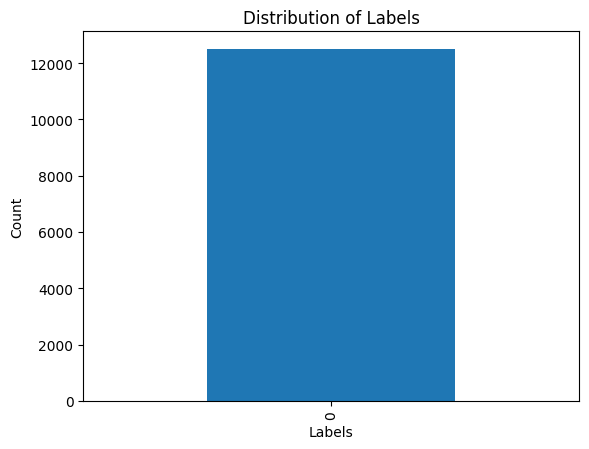

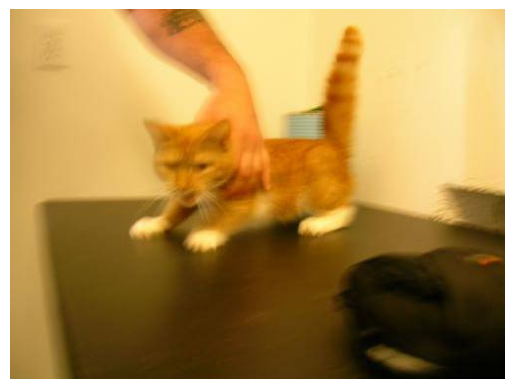

                 id    label
count  12500.000000  12500.0
mean    6250.500000      0.0
std     3608.583517      0.0
min        1.000000      0.0
25%     3125.750000      0.0
50%     6250.500000      0.0
75%     9375.250000      0.0
max    12500.000000      0.0
   id  label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

df = pd.read_csv('sampleSubmission.csv')
df.head()
df.describe()

df['label'].value_counts().plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

image_folder = 'trains'
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)]

img = Image.open(image_paths[0])
plt.imshow(img)
plt.axis('off')
plt.show()

print(df.describe())
print(df.head())





# Define a neural network of your choice

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))  # Input layer
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(output_dim, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train 2 networks 
### Training a network form scratch

In [7]:
from tensorflow import keras

# Define your model architecture
model_scratch = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model_scratch.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks_scratch = [
    keras.callbacks.ModelCheckpoint('best_model_scratch.h5', save_best_only=True),
]

# Train the model
history_scratch = model_scratch.fit(train_dataset=(180,180),validation_data=image_folder,epochs=10, batch_size=32, callbacks=callbacks_scratch)

# Plot accuracy and loss curves
plt.plot(history_scratch.history['accuracy'])
plt.plot(history_scratch.history['val_accuracy'])
plt.title('Model Accuracy (Training from Scratch)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_scratch.history['loss'])
plt.plot(history_scratch.history['val_loss'])
plt.title('Model Loss (Training from Scratch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'image_folder' is not defined

# Fine tuning VGG16

In [ ]:
from keras.applications import VGG16

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add new trainable layers on top
model_finetune = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model_finetune.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks_finetune = [
    keras.callbacks.ModelCheckpoint('best_model_finetune.h5', save_best_only=True),
]

# Train the model
history_finetune = model_finetune.fit(train_dataset(180,180), batch_size=32, validation_data=(image_size(180,180), batch_size=32),
                                      epochs=10, batch_size=32, callbacks=callbacks_finetune)

# Plot accuracy and loss curves
plt.plot(history_finetune.history['accuracy'])
plt.plot(history_finetune.history['val_accuracy'])
plt.title('Model Accuracy (Fine-tuning VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_finetune.history['loss'])
plt.plot(history_finetune.history['val_loss'])
plt.title('Model Loss (Fine-tuning VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2396923137.py, line 26)

# xplore the relative performance of the models (make sure to load the best version of each model) (2.5 points): 
### accuracy
### confusion metric
### precision, recall, F1-score,
### precision-recall curve.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt

# Load the best versions of each model
model1 = load_best_model1()
model2 = load_best_model2()

# Load the dataset
X_test, y_test = load_test_data()

# Calculate accuracy for each model
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)

# Compute confusion matrix for each model
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

# Calculate precision, recall, and F1-score for each model
report1 = classification_report(y_test, y_pred1)
report2 = classification_report(y_test, y_pred2)

# Plot precision-recall curves for each model
precision1, recall1, _ = precision_recall_curve(y_test, y_pred1)
precision2, recall2, _ = precision_recall_curve(y_test, y_pred2)

plt.plot(recall1, precision1, label='Model 1')
plt.plot(recall2, precision2, label='Model 2')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Explore specific examples where the models failed to predict correctly
misclassified_samples = X_test[y_test != y_pred1]  # Example for Model 1

NameError: name 'load_best_model1' is not defined